# Analysis: Water quality/ Calidad del agua

English
I am going to analyze this dataset to determine which variables have a greater correlation with the potability of the water, this dataset is available on the Kaggle site.
It is also intended to use an ML model for the prediction of water states (potable/non-potable).

Español
Voy a analizar este dataset para determinar cuales variables tienen una mayor correlacion con la potabilidad del agua, este dataset está disponible en el sitio de Kaggle.
Tambien se pretende utilizar un modelo de ML para la predicción de estados del agua(potable/no potable).


English
These libraries are imported to see the dataset, clean the nan or empty and make some visualizations.

Español
Se importan estas librerias para ver el dataset, limpiar los nan o vacios y hacer algunas visualizaciones.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

data = pd.read_csv("water_potability.csv")
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


English
The records in na are eliminated and it is verified that there are no columns with na

Español
Se eliminan los registros en na y se verifica que no queden columnas con na

In [3]:
data = data.dropna()
data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

English
Once the dataset has been cleaned, we analyze the mode of the Potability column, in order to verify that our dataset is
balanced

Español
Una vez limpiado el dataset, analizamos la moda de la columna Potabilidad, con el fin de verificar que nuestro dataset esté
balanceado

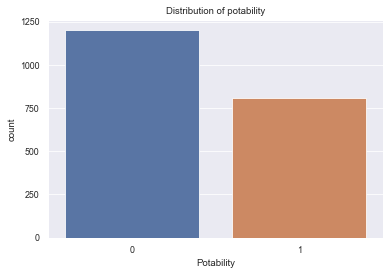

In [15]:
sns.countplot(x=data.Potability)
plt.title("Distribution of potability")
sns.set_theme(style="darkgrid", context="talk")
plt.show()

Text(0.5, 1.0, 'Balanced Data Set')

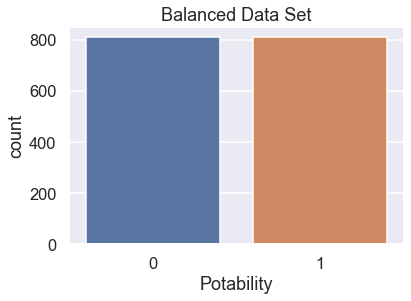

In [51]:
X = data.drop(columns="Potability", axis=0)

# Specify target column
y = data["Potability"]

# Import required library for resampling
from imblearn.under_sampling import RandomUnderSampler

# Instantiate Random Under Sampler
rus = RandomUnderSampler(random_state=42)

# Perform random under sampling
df_data, df_target = rus.fit_resample(X, y)

# Visualize new classes distributions
sns.countplot(x=df_target).set_title('Balanced Data Set')

English
It is always good to see the correlations of the variables, since they can be directly related to each other.


Español
Siempre es bueno ver las correlaciones de las variables, ya que entre ellas pueden estar directamete relacionadas.

In [31]:
correlation = data.corr()
correlation["ph"].sort_values(ascending=False)

ph                 1.000000
Hardness           0.108948
Organic_carbon     0.028375
Trihalomethanes    0.018278
Potability         0.014530
Conductivity       0.014128
Sulfate            0.010524
Chloramines       -0.024768
Turbidity         -0.035849
Solids            -0.087615
Name: ph, dtype: float64

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

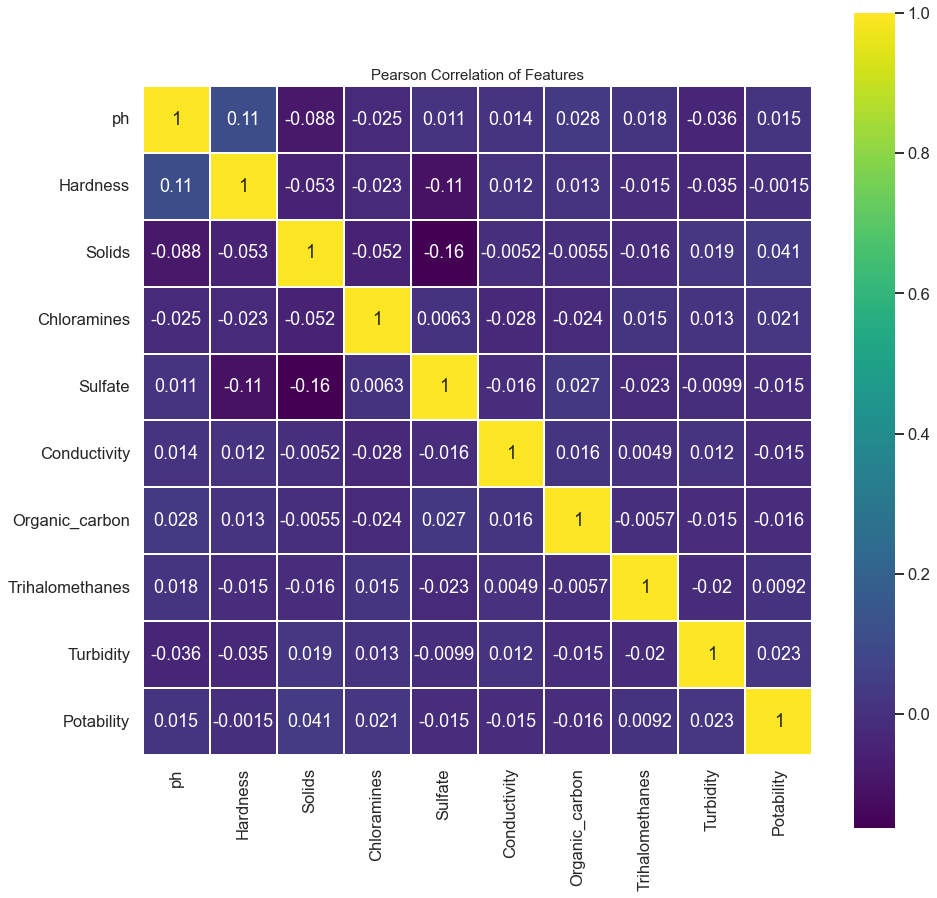

In [35]:
colormap = plt.cm.viridis
plt.figure(figsize=(15,15))
plt.title('Pearson Correlation of Features', size=15)

sns.heatmap(data.astype(float).corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)

English
We have already seen that we did not find very significant correlations in the Potability line, the largest of which are Solids.
Then we are ready to select the appropriate model to train with this dataset.

Español
Ya vimos que no encontramos correlaciones muy significativas en la linea de Potabilidad, la mayor de ella son los Solidos. Entonces nos disponemos a seleccionar el modelo adecuado para entrenarlo con este dataset.

In [45]:
from sklearn.model_selection import train_test_split

X = data.drop('Potability', axis=1)
y = data['Potability']
RS = 123

# Split dataframe into training and test/validation set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RS)

In [48]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from xgboost import XGBClassifier
import xgboost

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="rbf", C=0.025, probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis()]

In [49]:
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

KNeighborsClassifier
****Results****
Accuracy: 56.8238%
Log Loss: 4.695206466706686
SVC
****Results****
Accuracy: 63.7717%
Log Loss: 0.66224385899418
NuSVC
****Results****
Accuracy: 43.6725%
Log Loss: 0.6628556827248736
DecisionTreeClassifier
****Results****
Accuracy: 57.0720%
Log Loss: 14.826819643472822
RandomForestClassifier
****Results****
Accuracy: 70.9677%
Log Loss: 0.5876437446652556
XGBClassifier
****Results****
Accuracy: 69.9752%
Log Loss: 0.6719926156273468
AdaBoostClassifier
****Results****
Accuracy: 62.5310%
Log Loss: 0.6929675978174188
GradientBoostingClassifier
****Results****
Accuracy: 68.9826%
Log Loss: 0.6089915617752214
GaussianNB
****Results****
Accuracy: 63.2754%
Log Loss: 0.6398350425501369
LinearDiscriminantAnalysis
****Results****
Accuracy: 63.7717%
Log Loss: 0.6569157290809173
QuadraticDiscriminantAnalysis
****Results****
Accuracy: 71.2159%
Log Loss: 0.5676740095620433


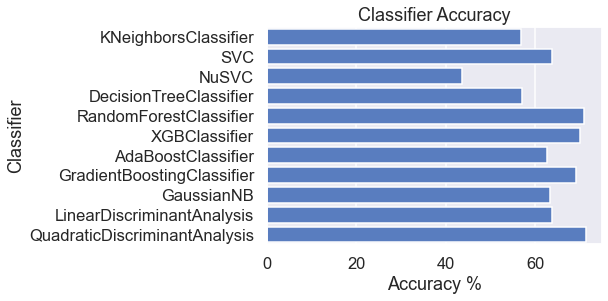

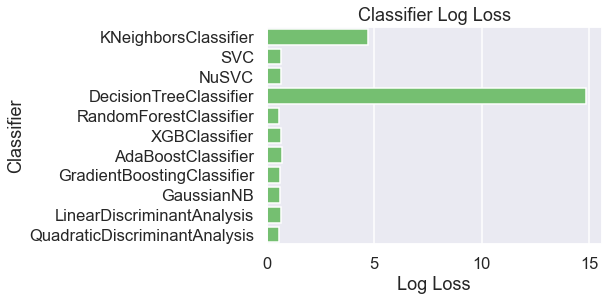

In [50]:
sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()

English
Clearly the winning model here is the Quadratic Discriminant Analysis together with the Random Forest Classifier, the latter one of the most used in natural and everyday phenomena. 


Español
Claramente el modelo ganador aquí es el Análisis Discriminante Cuadrático junto a Clasificador de bosque aleatorio, este último de los más utilizados en fenomenos naturales y cotidianos. 